# Question 8

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
root = './A2_resources/'

In [3]:
def read(path, arg = cv2.IMREAD_UNCHANGED):
    args = {'gray' : cv2.IMREAD_GRAYSCALE, 'unchanged' : cv2.IMREAD_UNCHANGED, 'color' : cv2.IMREAD_COLOR}
    return cv2.imread(path, args[arg])

In [4]:
def strided(img, kernel):
    img = img.astype('float32')
    img = np.pad(img, (np.int16((kernel.shape[0]-1)/2), np.int16((kernel.shape[1]-1)/2)), 'reflect')
    expanded_input = np.lib.stride_tricks.as_strided(
    img,
    shape=(
        img.shape[0] - kernel.shape[0] + 1,
        img.shape[1] - kernel.shape[1] + 1,
        kernel.shape[0],
        kernel.shape[1],
    ),
    strides=(
        img.strides[0],
        img.strides[1],
        img.strides[0],
        img.strides[1],
    )
)
    return expanded_input

In [5]:
def medianStrided(img, k):
    img = img.astype('int32')
    kernel = np.ones((k, k))/(k*k)
    expanded = np.median(strided(img, kernel), axis = (2,3))
    return np.uint8(expanded)

In [6]:
def applyFilter(imfilter, img, k):
    if len(img.shape) == 2:
        return imfilter(img,k)
    else:
        return np.dstack((imfilter(img[:,:,0],k),imfilter(img[:,:,1],k),imfilter(img[:,:,2],k)))

In [7]:
deg = read(root+'Degraded.jpg', 'color')
deg = cv2.cvtColor(deg, cv2.COLOR_BGR2RGB)
clr = read(root+'Clear.jpg', 'color')
clr = cv2.cvtColor(clr, cv2.COLOR_BGR2RGB)

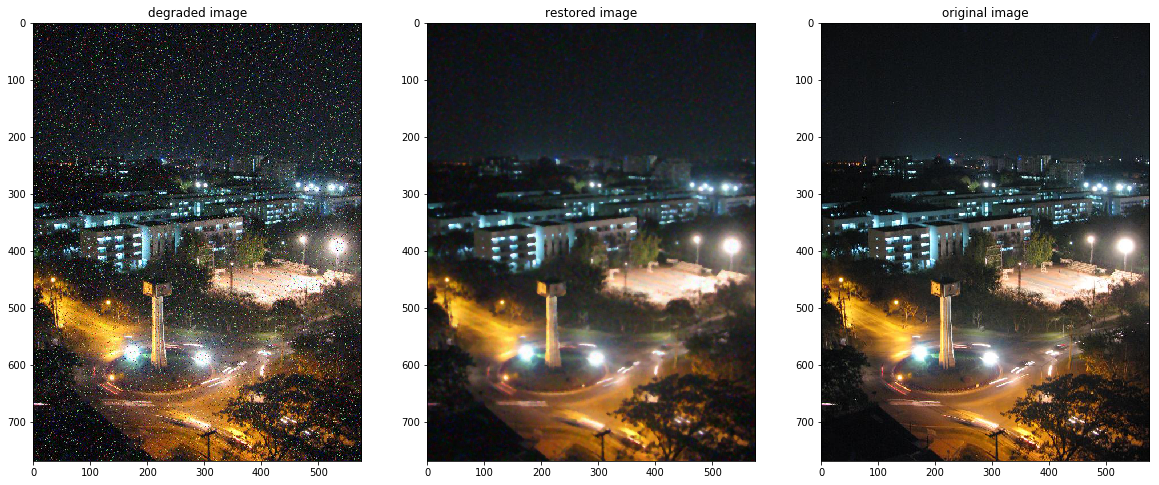

In [8]:
_,plots = plt.subplots(1,3,figsize=(20,20))
plots[0].imshow(deg)
plots[0].set_title('degraded image')
plots[1].imshow(applyFilter(medianStrided, deg, 5))
plots[1].set_title('restored image')
plots[2].imshow(clr)
plots[2].set_title('original image')
plt.show()

### Explaination (Median filter)
- As the noise is like salt and pepper noise, so in this scenario median filter was used. Thus the median value of each window is taken and this gives good results.